# Rohlik Orders

Implementation of a forecasting algorithm for the past Rohlik Orders challenge in Kaggle. The problem consists of predicting the number of orders in 7 different e-grocery warehouses from different countries in Europe, using the previous three years as training data.

https://www.kaggle.com/competitions/rohlik-orders-forecasting-challenge

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv').rename(columns = {'date':'ds', 'orders':'y'})
test = pd.read_csv('test.csv').rename(columns = {'date':'ds'})
template = pd.read_csv('solution_example.csv')

Get the holidays from the training data.

In [4]:
train['holiday_name'].fillna('Unknown', inplace = True)
test['holiday_name'].fillna('Unknown', inplace = True)

In [5]:
train.head()

,warehouse,ds,y,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,Unknown,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,Unknown,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,Unknown,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,Unknown,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,Unknown,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [6]:
test.head()

,warehouse,ds,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2024-03-16,Unknown,0,0,0,0,Prague_1_2024-03-16
1,Prague_1,2024-03-17,Unknown,0,0,0,0,Prague_1_2024-03-17
2,Prague_1,2024-03-18,Unknown,0,0,0,0,Prague_1_2024-03-18
3,Prague_1,2024-03-19,Unknown,0,0,0,0,Prague_1_2024-03-19
4,Prague_1,2024-03-20,Unknown,0,0,0,0,Prague_1_2024-03-20


In [7]:
def mape (forecasted_values, actual_values):
    return 100 * (abs((actual_values - forecasted_values)/actual_values)/len(actual_values))

In [8]:
train_holidays = train[
    (train['mini_shutdown'] == 1) |
    (train['shops_closed'] == 1) |
    (train['shutdown']) == 1 |
    (train['holiday'] == 1) |
    (train['winter_school_holidays'] == 1) |
    (train['school_holidays'] == 1) |
    (train['blackout'] == 1) |
    (train['frankfurt_shutdown'] == 1)
][['ds','holiday_name']]

In [9]:
test_holidays = test[
    (test['shops_closed'] == 1) |
    (test['holiday'] == 1) |
    (test['winter_school_holidays'] == 1) |
    (test['school_holidays'] == 1)
][['ds','holiday_name']]

In [10]:
train_holidays['ds'] = pd.to_datetime(train_holidays['ds'])
test_holidays['ds'] = pd.to_datetime(test_holidays['ds'])

In [11]:
train_holidays.rename(columns = {'holiday_name' : 'holiday'}, inplace = True)
test_holidays.rename(columns = {'holiday_name' : 'holiday'}, inplace = True)

In [12]:
holiday_dates = pd.DataFrame(pd.concat([train_holidays, test_holidays])).rename(columns = {'holiday_name' : 'holiday'})
holiday_dates['holiday'].replace(0, 'Unknown', inplace = True)

In [26]:
# White background in graphs
plt.style.use('classic')

# Dimensions of every pyplot figure. Change to suit your needs
plt.rcParams['figure.figsize'] = [5, 5]

# PROPHET

In [14]:
import logging
from prophet import Prophet
logging.getLogger('prophet').disabled = True

/media/kingston/Pythonlibs/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
prague1 = train[train['warehouse'] == 'Prague_1']
prague2 = train[train['warehouse'] == 'Prague_2']
prague3 = train[train['warehouse'] == 'Prague_3']
frankfurt = train[train['warehouse'] == 'Frankfurt_1']
budapest = train[train['warehouse'] == 'Budapest_1']
munich = train[train['warehouse'] == 'Munich_1']
brno = train[train['warehouse'] == 'Brno_1']

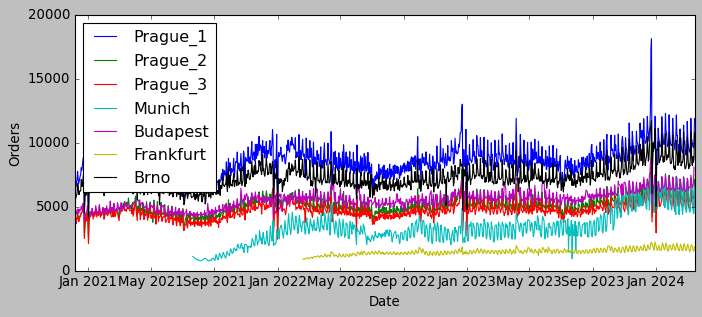

In [50]:
plt.plot(pd.to_datetime(prague1['ds']), prague1['y'], label = 'Prague_1')
plt.plot(pd.to_datetime(prague2['ds']),prague2['y'], label = 'Prague_2')
plt.plot(pd.to_datetime(prague3['ds']),prague3['y'], label = 'Prague_3')
plt.plot(pd.to_datetime(munich['ds']),munich['y'], label = 'Munich')
plt.plot(pd.to_datetime(budapest['ds']),budapest['y'], label = 'Budapest')
plt.plot(pd.to_datetime(frankfurt['ds']),frankfurt['y'], label = 'Frankfurt')
plt.plot(pd.to_datetime(brno['ds']),brno['y'], label = 'Brno')
plt.legend(loc = 'best')
plt.ylabel('Orders')
plt.xlabel('Date')
plt.show()

In [16]:
offsets = {}
for warehouse in set(test['warehouse']):
    offsets[warehouse] = len(test[test['warehouse'] == warehouse])

In [17]:
predictions = {}
yhat = {}
yhat_modified = {}

In [18]:
import itertools
from scipy.stats import uniform
from prophet.diagnostics import cross_validation, performance_metrics

01:13:25 - cmdstanpy - INFO - Chain [1] start processing
01:13:26 - cmdstanpy - INFO - Chain [1] done processing


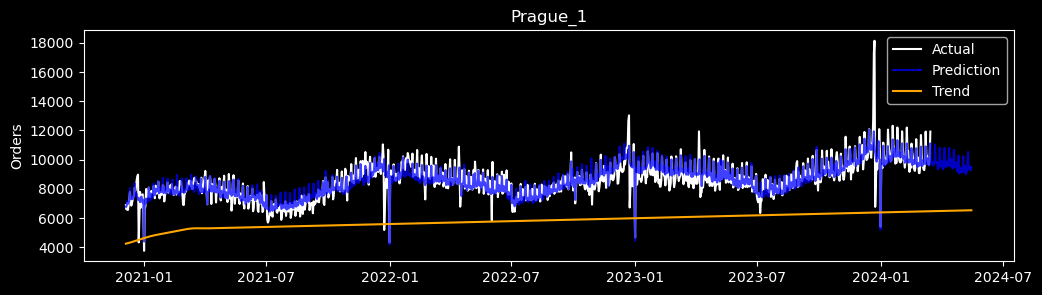

01:13:27 - cmdstanpy - INFO - Chain [1] start processing
01:13:27 - cmdstanpy - INFO - Chain [1] done processing


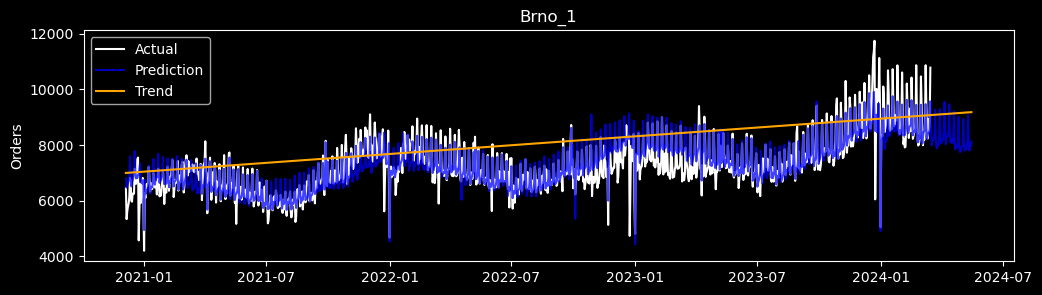

01:13:29 - cmdstanpy - INFO - Chain [1] start processing
01:13:29 - cmdstanpy - INFO - Chain [1] done processing


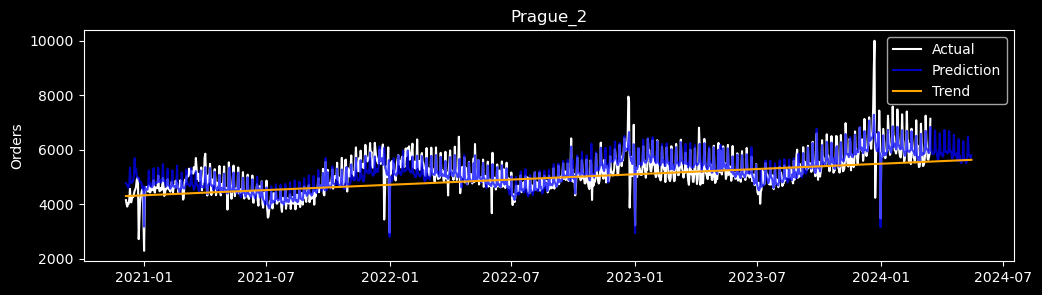

01:13:31 - cmdstanpy - INFO - Chain [1] start processing
01:13:31 - cmdstanpy - INFO - Chain [1] done processing


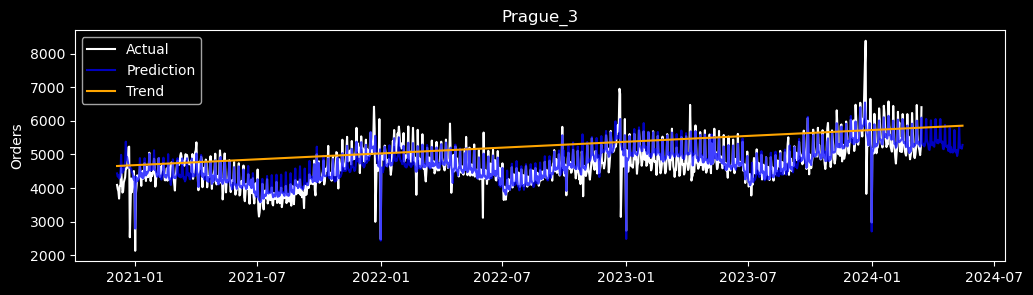

01:13:32 - cmdstanpy - INFO - Chain [1] start processing
01:13:32 - cmdstanpy - INFO - Chain [1] done processing


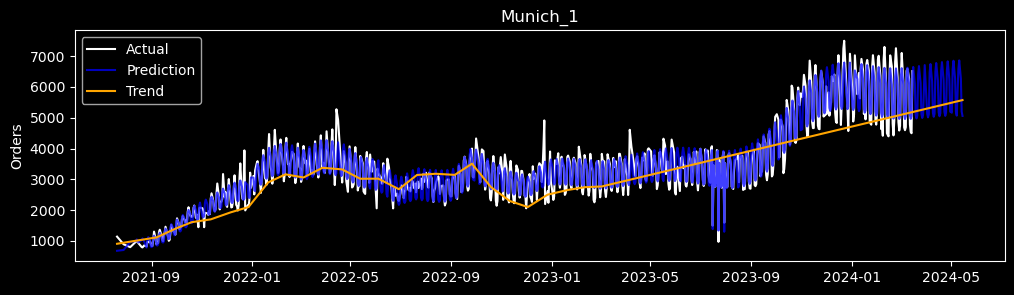

01:13:33 - cmdstanpy - INFO - Chain [1] start processing
01:13:34 - cmdstanpy - INFO - Chain [1] done processing


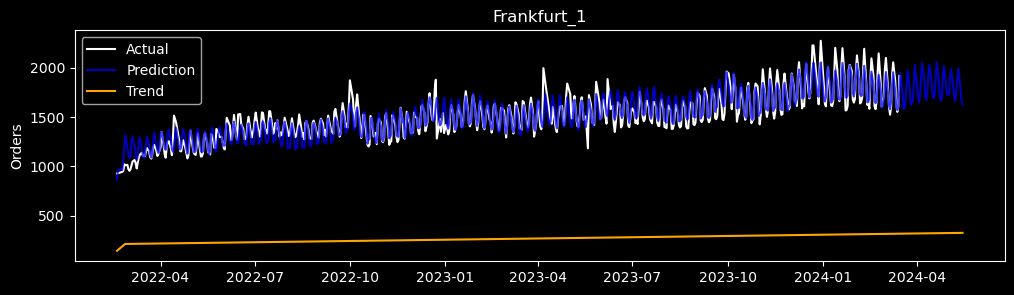

01:13:35 - cmdstanpy - INFO - Chain [1] start processing
01:13:35 - cmdstanpy - INFO - Chain [1] done processing


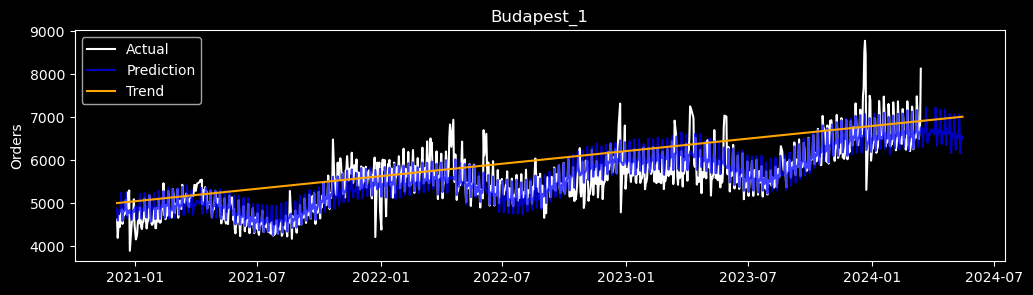

In [19]:
plt.rcParams['figure.figsize'] = [12, 3]
transformed = {}
prediction_tables = {}
cv_tables = {}
for warehouse in [prague1, brno, prague2, prague3, munich, frankfurt, budapest]:
#for warehouse in [munich, frankfurt, budapest]:

    name = list(warehouse['warehouse'])[0]

    train_dates = train[train['warehouse'] == name]['ds']
    test_dates = test[test['warehouse'] == name]['ds']

    #dates_to_predict = pd.DataFrame(train_dates)
    dates_to_predict = pd.DataFrame(pd.concat([train_dates, test_dates]))
    #dates_to_predict = pd.DataFrame(test_dates)
    
    dates_to_predict['ds'] = pd.to_datetime(dates_to_predict['ds'])
    
    #future = m.make_future_dataframe(periods = offsets[name])
    future = dates_to_predict

    #param_grid = {  
    #    'changepoint_prior_scale': [0.01, 0.1, 1.0, 10.0],
    #    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
        #'growth' : ['logistic', 'linear'],
        #'n_changepoints' : [0, 10, 25, 40, 50],
    #    'changepoint_range'  : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
        #'yearly_seasonality' : [True, False],
        #'weekly_seasonality' : [True, False],
        #'daily_seasonality' : [True, False],
        #'seasonality_mode' : ['additive', 'multiplicative'],
        #'seasonality_prior_scale' : random.uniform(5.0, 15.0),
        #'changepoint_prior_scale' : random.uniform(0.0, 0.1),
        #'interval_width' : uniform(0.2, 0.8),
        #'uncertainty_samples' : [500, 1000, 1500, 2000],
    #    'holidays_prior_scale' : [0.1, 1.0, 10.0],
    #}

    #all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    #rmses = []  # Store the RMSEs for each params here

    # Use cross validation to evaluate all parameters
    #for params in all_params:
    #    m = Prophet(**params).fit(warehouse)  # Fit model with given params
    #    df_cv = cross_validation(
    #        m,
            #cutoffs=cutoffs,
            #horizon='61 days',
    #        initial = '365 days',
    #        horizon = '30 days',
    #        parallel = "processes"
    #    )
    #    df_p = performance_metrics(df_cv, rolling_window=1)
    #    rmses.append(df_p['rmse'].values[0])

    # Find the best parameters
    #tuning_results = pd.DataFrame(all_params)
    #tuning_results['rmse'] = rmses
    #tuning_results = tuning_results.sort_values('rmse')
    #cv_tables[name] = tuning_results

    #param1 = list(tuning_results['changepoint_prior_scale'])[0]
    #param2 = list(tuning_results['seasonality_prior_scale'])[0]
    #param3 = list(tuning_results['n_changepoints'])[0]
    #param4 = list(tuning_results['changepoint_range'])[0]
    #param5 = list(tuning_results['yearly_seasonality'])[0]
    #param6 = list(tuning_results['weekly_seasonality'])[0]
    #param7 = list(tuning_results['daily_seasonality'])[0]
    #param8 = list(tuning_results['seasonality_mode'])[0]
    #param9 = list(tuning_results['seasonality_prior_scale'])[0]
    #param10 = list(tuning_results['changepoint_prior_scale'])[0]
    #param11 = list(tuning_results['interval_width'])[0]
    #param12 = list(tuning_results['uncertainty_samples'])[0]
    #param13 = list(tuning_results['holidays_prior_scale'])[0]


    if name == 'Prague_1':
        m = Prophet(
            holidays = train_holidays,
            changepoint_prior_scale = 1,
            seasonality_prior_scale = 1,
            changepoint_range = 0.1,
            holidays_prior_scale = 1,
            yearly_seasonality = True,
            seasonality_mode = 'multiplicative'
        ).add_seasonality(
            name = 'monthly',
            period = 30.5,
            fourier_order = 20,
            prior_scale = 45
        ).add_seasonality(
            name = 'weekly',
            period = 7,
            fourier_order = 25,
            prior_scale = 30
        ).add_seasonality(
            name = 'yearly',
            period = 365.25,
            fourier_order = 20, #CHECK THIS
            prior_scale = 55
        )
        m.fit(warehouse)
        forecast = m.predict(future)
    elif name == 'Brno_1':
        m = Prophet(
            holidays = train_holidays,
            changepoint_prior_scale = 1,
            seasonality_prior_scale = 1,
            changepoint_range = 0,
            #holidays_prior_scale = 1,
            seasonality_mode = 'multiplicative'
        ).add_seasonality(
            name = 'monthly',
            period = 30.5,
            fourier_order = 15,
            prior_scale = 25
        ).add_seasonality(
            name = 'weekly',
            period = 7,
            fourier_order = 20,
            prior_scale = 10
        ).add_seasonality(
            name = 'yearly',
            period = 365.25,
            fourier_order = 15, #CHECK THIS
            prior_scale = 20
        )
        m.fit(warehouse)
        forecast = m.predict(future)
    elif name == 'Prague_2':
        m = Prophet(
            holidays = train_holidays,
            changepoint_prior_scale = 1,
            seasonality_prior_scale = 1,
            changepoint_range = 0,
            holidays_prior_scale = 1,
            seasonality_mode = 'multiplicative'
        ).add_seasonality(
            name = 'monthly',
            period = 30.5,
            fourier_order = 20,
            prior_scale = 45
        ).add_seasonality(
            name = 'weekly',
            period = 7,
            fourier_order = 25,
            prior_scale = 30
        ).add_seasonality(
            name = 'yearly',
            period = 365.25,
            fourier_order = 20, #CHECK THIS
            prior_scale = 55
        )
        m.fit(warehouse)
        forecast = m.predict(future)
    elif name == 'Prague_3':
        m = Prophet(
            holidays = train_holidays,
            changepoint_prior_scale = 1,
            seasonality_prior_scale = 1,
            changepoint_range = 0,
            holidays_prior_scale = 1,
            seasonality_mode = 'multiplicative'
        ).add_seasonality(
            name = 'monthly',
            period = 30.5,
            fourier_order = 20,
            prior_scale = 45
        ).add_seasonality(
            name = 'weekly',
            period = 7,
            fourier_order = 25,
            prior_scale = 30
        ).add_seasonality(
            name = 'yearly',
            period = 365.25,
            fourier_order = 20, #CHECK THIS
            prior_scale = 55
        )
        m.fit(warehouse)
        forecast = m.predict(future)
    elif name == 'Munich_1':
        m = Prophet(
            holidays = train_holidays,
            changepoint_prior_scale = 10,
            seasonality_prior_scale = 10,
            changepoint_range = 0.6,
            holidays_prior_scale = 10,
            seasonality_mode = 'multiplicative'
        ).add_seasonality(
            name = 'yearly',
            period = 365.25,
            fourier_order = 3, #CHECK THIS
            prior_scale = 15
        )
        
        m.fit(warehouse)
        forecast = m.predict(future)
    elif name == 'Frankfurt_1':
        m = Prophet(
            holidays = train_holidays,
            changepoint_prior_scale = 1,
            seasonality_prior_scale = 1,
            changepoint_range = 0.01,
            holidays_prior_scale = 100,
            seasonality_mode = 'multiplicative'
        ).add_seasonality(
            name = 'monthly',
            period = 30.5,
            fourier_order = 15,
            prior_scale = 45
        ).add_seasonality(
            name = 'weekly',
            period = 7,
            fourier_order = 15,
            prior_scale = 30
        ).add_seasonality(
            name = 'yearly',
            period = 365.25,
            fourier_order = 10, #CHECK THIS
            prior_scale = 200
        )
        m.fit(warehouse)
        forecast = m.predict(future)
    else:
        m = Prophet(
            holidays = train_holidays,
            changepoint_prior_scale = 0.1,
            seasonality_prior_scale = 10,
            changepoint_range = 0,
            holidays_prior_scale = 0.1,
            seasonality_mode = 'multiplicative'
        ).add_seasonality(
            name = 'monthly',
            period = 30.5,
            fourier_order = 10,
            #prior_scale = 45
        ).add_seasonality(
            name = 'weekly',
            period = 7,
            fourier_order = 25,
            #prior_scale = 30
        ).add_seasonality(
            name = 'yearly',
            period = 365.25,
            fourier_order = 2, #CHECK THIS
            #prior_scale = 15
        )
        m.fit(warehouse)
        forecast = m.predict(future)
    
    #forecast = m.predict(future)

    # MERE VALUE
    predictions[name] = list(forecast['yhat'])[-offsets[name]:]
    
    # TRANSFORMED VALUE
    predictions_transformed = []
    #if name in ['Prague_1', 'Prague_2', 'Prague_3']:
        
    for i in range(len(forecast['yhat'])):
        # MIN-MAX
        predictions_transformed.append (
            forecast['yhat_lower'][i] + (
               ((forecast['yhat'][i] - forecast['yhat'].min()) * (forecast['yhat_upper'][i] - forecast['yhat_lower'][i]))/
                (forecast['yhat'].max() - forecast['yhat'].min())
            )
        )

        #if forecast['yhat'][i] > forecast['trend'][i]:
        #    predictions_transformed.append(forecast['yhat_upper'][i])
        #elif forecast['yhat'][i] < forecast['trend'][i]:
        #    predictions_transformed.append(forecast['yhat_lower'][i])
        #else:
        #    predictions_transformed.append(forecast['yhat'])

    transformed[name] = predictions_transformed[-offsets[name]:]

    yhat[name] = list(forecast['yhat'])[:-offsets[name]]
    yhat_modified[name] = predictions_transformed[:-offsets[name]]
    prediction_tables[name] = forecast
    
    plt.plot(pd.to_datetime(warehouse['ds']), np.array(warehouse['y']), color = 'white', label = 'Actual')
    #plt.plot(dates_to_predict, np.array(forecast['yhat_upper']), color = 'cyan', alpha = 0.5, label = 'Upper')
    #plt.plot(dates_to_predict, np.array(forecast['yhat_lower']), color = 'cyan', alpha = 0.5, label = 'Lower')
    #plt.plot(dates_to_predict, np.array(predictions_transformed), color = 'red', alpha = 0.6)
    plt.plot(dates_to_predict, np.array(forecast['yhat']), color = 'blue', alpha = 0.75, label = 'Prediction')
    plt.plot(dates_to_predict, np.array(forecast['trend']), color = 'orange', label = 'Trend')
    #plt.plot(dates_to_predict, np.array(warehouse['user_activity_1']), color = 'orange', label = 'User 1')

    plt.title(name)
    plt.ylabel('Orders')
    plt.legend(loc = 'best')
    plt.show()

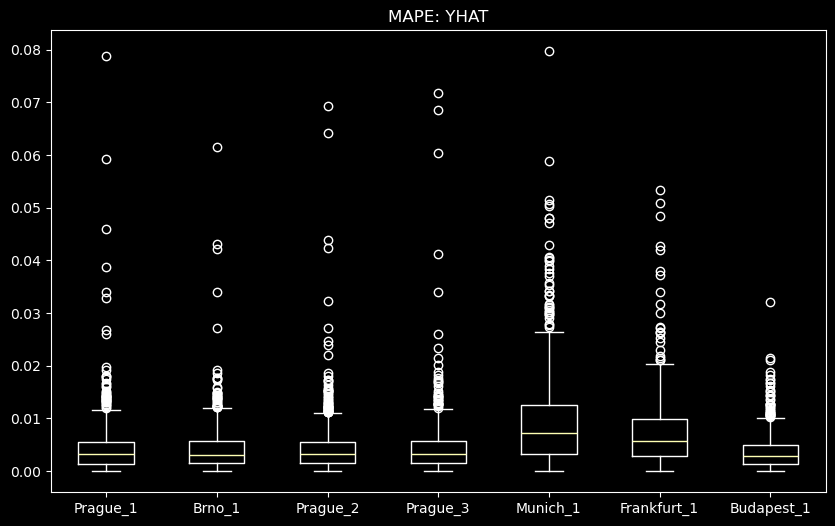

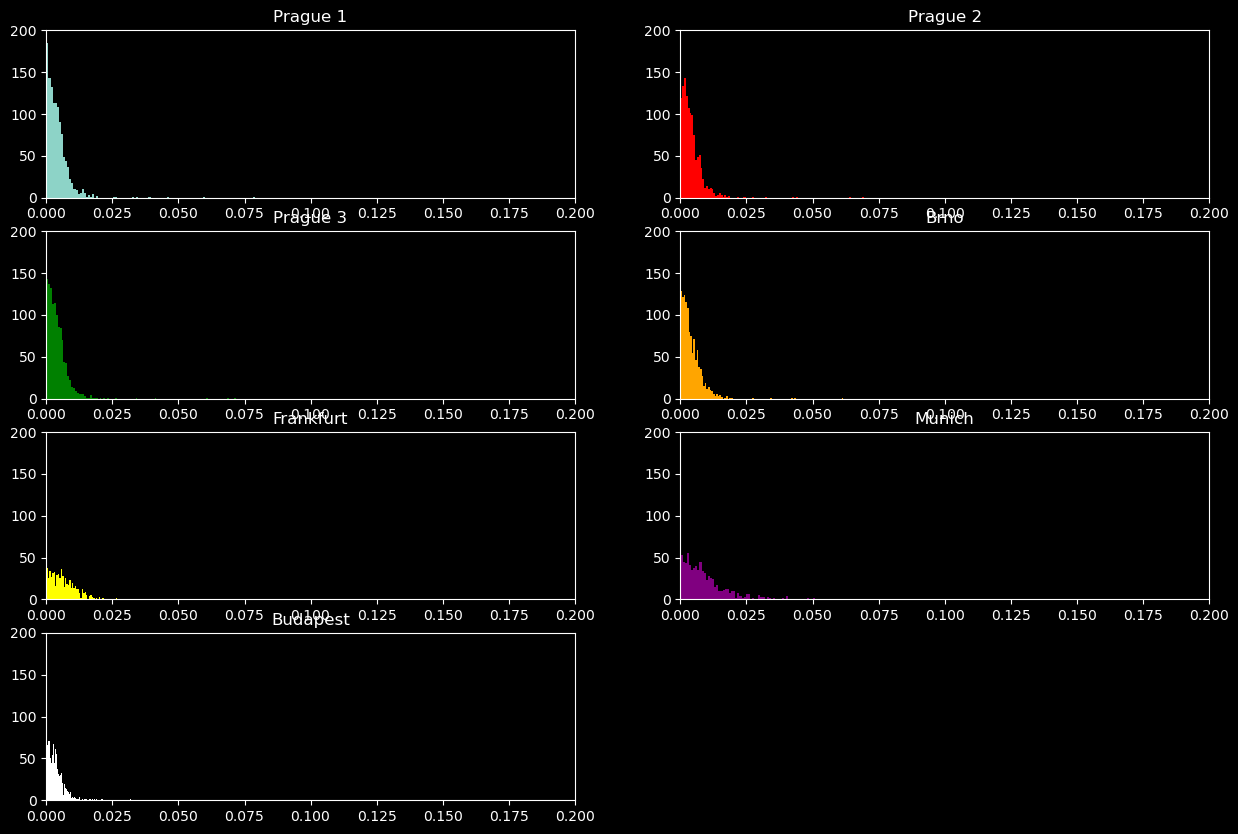

0.005314464102977981

In [20]:
plt.rcParams['figure.figsize'] = [10, 6]

#yhat = yhat_modified

fig, ax = plt.subplots()
ax.boxplot(
    [
    mape(yhat['Prague_1'], prague1['y']),
    mape(yhat['Brno_1'], brno['y']),
    mape(yhat['Prague_2'], prague2['y']),
    mape(yhat['Prague_3'], prague3['y']),
    mape(yhat['Munich_1'], munich['y']),
    mape(yhat['Frankfurt_1'], frankfurt['y']),
    mape(yhat['Budapest_1'], budapest['y'])
    ]
)
ax.set_xticklabels(yhat.keys())
plt.title('MAPE: YHAT')
plt.show()

prague1_mape = mape(yhat['Prague_1'], prague1['y'])
brno_mape = mape(yhat['Brno_1'], brno['y'])
prague2_mape = mape(yhat['Prague_2'], prague2['y'])
prague3_mape = mape(yhat['Prague_3'], prague3['y'])
munich_mape = mape(yhat['Munich_1'], munich['y'])
frankfurt_mape = mape(yhat['Frankfurt_1'], frankfurt['y'])
budapest_mape = mape(yhat['Budapest_1'], budapest['y'])

mean_mape = (
    np.mean(prague1_mape) +
    np.mean(brno_mape) +
    np.mean(prague2_mape) +
    np.mean(prague3_mape) +
    np.mean(munich_mape) +
    np.mean(frankfurt_mape) +
    np.mean(budapest_mape)
)/7

plt.rcParams['figure.figsize'] = [15, 10]

plt.subplot(4, 2, 1)
plt.hist(prague1_mape, bins = 100)
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.title('Prague 1')
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.subplot(4, 2, 2)
plt.hist(prague2_mape, bins = 100, color = 'red')
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.title('Prague 2')
plt.subplot(4, 2, 3)
plt.hist(prague3_mape, bins = 100, color = 'green')
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.title('Prague 3')
plt.subplot(4, 2, 4)
plt.hist(brno_mape, bins = 100, color = 'orange')
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.title('Brno')
plt.subplot(4, 2, 5)
plt.hist(frankfurt_mape, bins = 100, color = 'yellow')
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.title('Frankfurt')
plt.subplot(4, 2, 6)
plt.hist(munich_mape, bins = 100, color = 'purple')
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.title('Munich')
plt.subplot(4, 2, 7)
plt.title('Budapest')
plt.hist(budapest_mape, bins = 100, color = 'white')
plt.ylim(0, 200)
plt.xlim(0, 0.2)
plt.show()

mean_mape

In [180]:
resultados = pd.DataFrame()
for i in predictions.keys():
    resultados = pd.concat([resultados, pd.DataFrame(predictions[i])], axis = 1)

In [181]:
resultados.columns = list(predictions.keys())

In [182]:
final_prophet = []
for warehouse in predictions.keys():
    for value in predictions[warehouse]:
        final_prophet.append(round(value))

In [183]:
template['orders'] = final_prophet

In [184]:
template.to_csv('PROPHET_Results.csv', index = False)

# Fitting polinomials

In [21]:
historic = {}
for warehouse in set(train['warehouse']):
    historic[warehouse] = np.array(train[train['warehouse'] == warehouse]['y'])

In [22]:
historic.keys()

dict_keys(['Prague_1', 'Munich_1', 'Brno_1', 'Prague_2', 'Prague_3', 'Frankfurt_1', 'Budapest_1'])

In [23]:
polinomials = {}
comparison_polinomials = {}

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNet, Ridge, LogisticRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

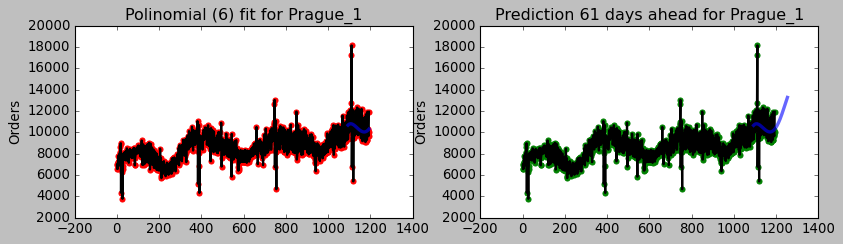

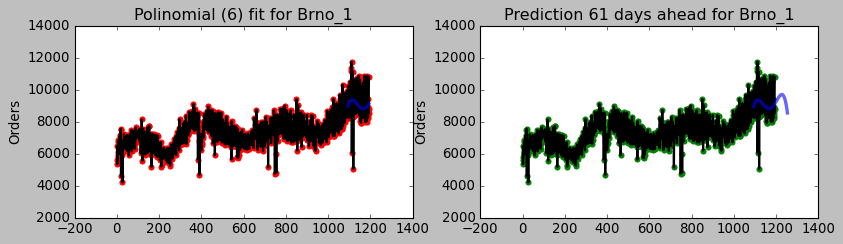

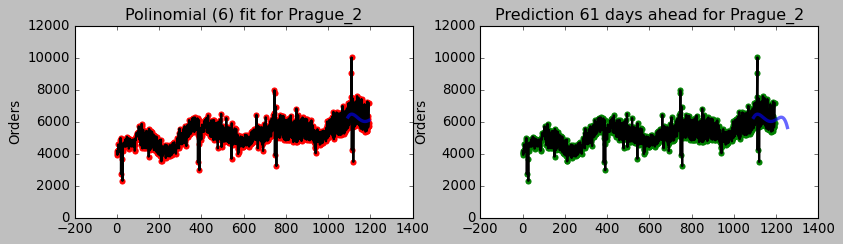

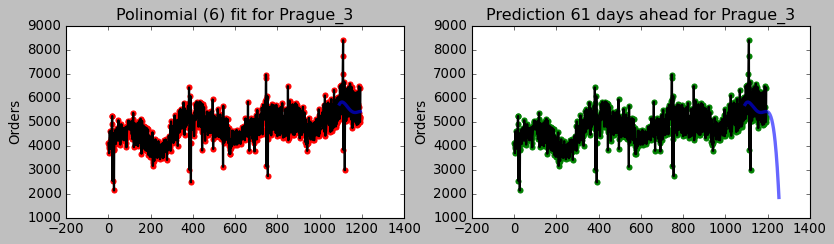

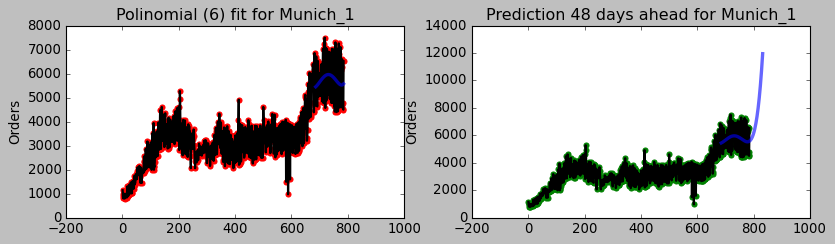

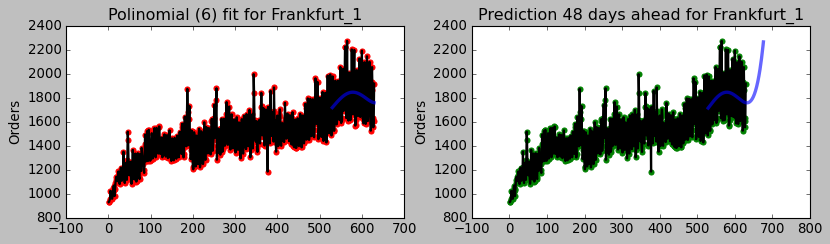

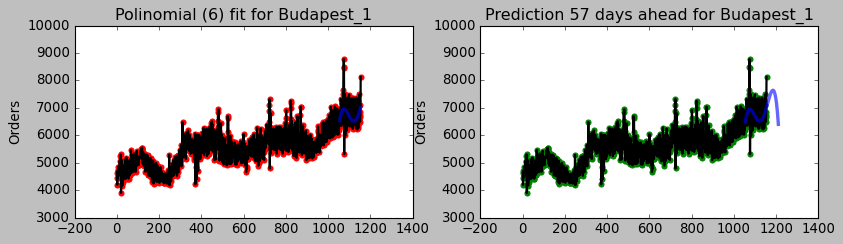

In [27]:
plt.rcParams['figure.figsize'] = [12, 3]
for warehouse in ['Prague_1', 'Brno_1', 'Prague_2', 'Prague_3', 'Munich_1', 'Frankfurt_1', 'Budapest_1']:
    
    degree = 6

    train_period_days = 100
    
    poly_reg = PolynomialFeatures(
        degree = degree,
        interaction_only = False,
        include_bias = True,
        
    )

    x = np.array(range(1, len(historic[warehouse])+1)).reshape(-1,1)
    y = np.array(historic[warehouse]).reshape(-1,1)

    #X_poly = poly_reg.fit_transform(x)
    X_poly = poly_reg.fit_transform(x[-train_period_days:])

    prueba = LinearRegression(n_jobs = -1)
    #prueba = LogisticRegression(n_jobs = -1)
    #prueba = DecisionTreeRegressor()
    #prueba = RandomForestRegressor(n_jobs = -1)
    #prueba = Ridge()
    #prueba = ElasticNet()
    #prueba = HuberRegressor()
    #prueba = Lasso()
    #prueba = SVR()

    prueba.fit(
        X_poly,
        #y
        #X_poly[-120:],
        y[-train_period_days:]
    )

    plt.subplot(1, 2, 1)
    plt.plot(x, y, color='black', linewidth = 2)
    plt.scatter(x, y, color = 'red')
    plt.plot(x[-train_period_days:], prueba.predict(X_poly), color='blue', linewidth = 3, alpha = 0.6)
    plt.ylabel('Orders')
    plt.title('Polinomial (%d) fit for %s' % (degree, warehouse))
    #plt.xlabel('Time')

    z = np.array(range(1, len(historic[warehouse])+offsets[warehouse])).reshape(-1,1)
    #z = z[-train_period_days:]

    plt.subplot(1, 2, 2)
    plt.plot(
        x,
        y,
        color='black',
        linewidth = 2
    )
    plt.scatter(x,y, color = 'green')
    plt.plot(
        z[-train_period_days - offsets[warehouse]:],
        np.array(prueba.predict(poly_reg.fit_transform(z[(-train_period_days - offsets[warehouse]):]))),
        color = 'blue',
        linewidth = 3,
        alpha = 0.6
    )
    plt.ylabel('Orders')
    #plt.xlim(600,len(historic[warehouse]) + 100)
    plt.title('Prediction %d days ahead for %s' % (offsets[warehouse], warehouse))
    plt.show()

    ## SAVE THE CURRENT POLINOMIAL ##
    comparison_polinomials[warehouse] = np.array(prueba.predict(poly_reg.fit_transform(z)))
    polinomials[warehouse] = prueba.predict(poly_reg.fit_transform(z))

In [67]:
final_polinomial = []
for warehouse in polinomials.keys():
    for value in polinomials[warehouse][-offsets[warehouse]:]:
        final_polinomial.append(round(value[0]))

In [68]:
polinomials_df = pd.DataFrame(template)
polinomials_df['orders'] = final_polinomial
#polinomials_df.to_csv('Nuevas_polinomiales200824.csv', index = False)

# Other forecasting methods: SKForecast

In [28]:
import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import LogisticRegression, ElasticNet, Ridge, LinearRegression, HuberRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [29]:
plt.rcParams['figure.figsize'] = [10, 4]

/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


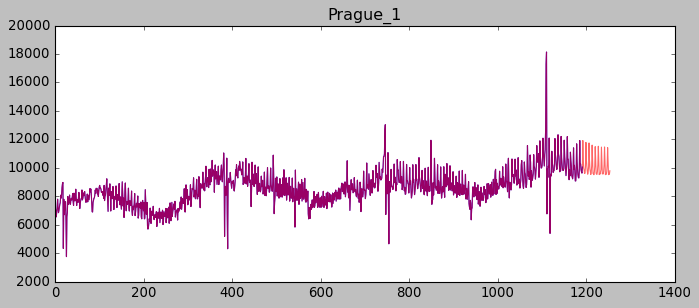

/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


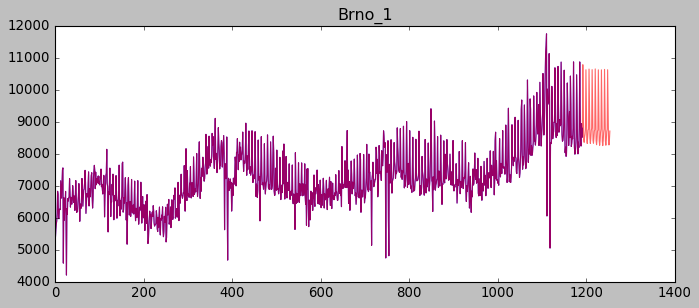

/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


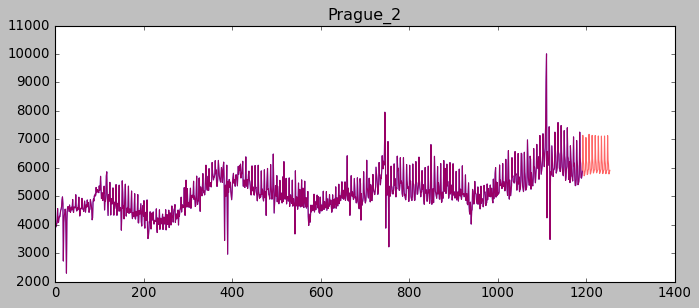

/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


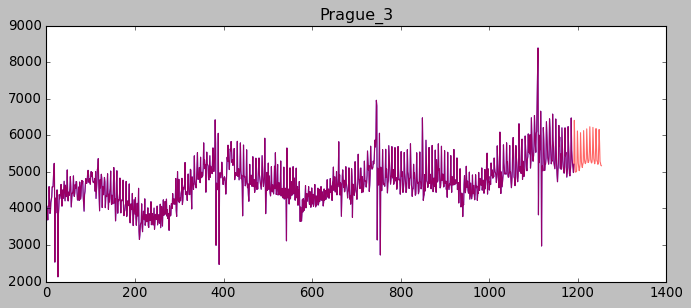

/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


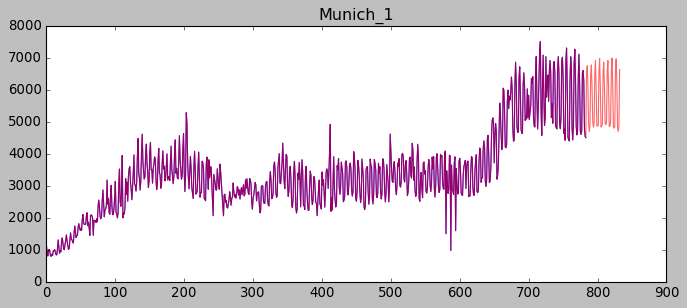

/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


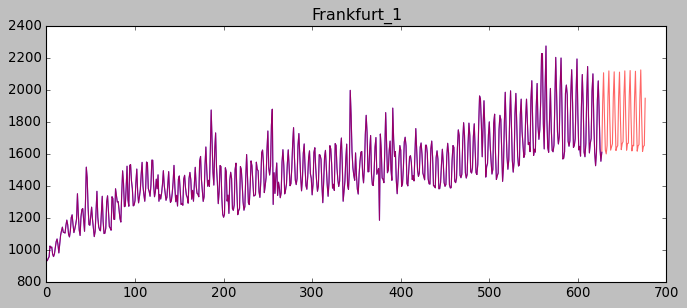

/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/adan/.local/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


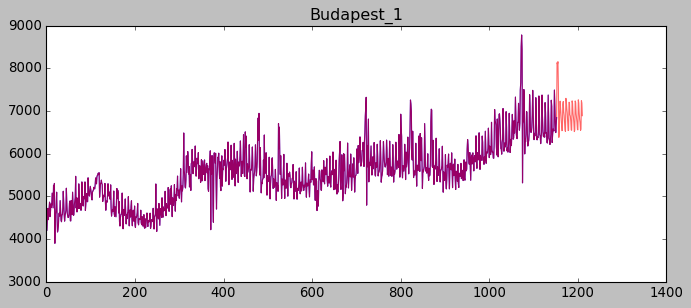

In [30]:
forecasted = {}
forecasted_complete = {}

regressor = RandomForestRegressor(
    #n_estimators = 1000,
    max_depth = None,
    random_state = 6969,
    n_jobs = -1,
    verbose = False
)

#regressor = MLPClassifier()
#regressor = DecisionTreeRegressor()
#regressor = MLPRegressor(hidden_layer_sizes = (50,100,50))
#regressor = LogisticRegression(n_jobs = -1)
#regressor = LinearRegression(n_jobs = -1)
#regressor = ElasticNet()
#regressor = HuberRegressor()

for warehouse in ['Prague_1', 'Brno_1', 'Prague_2', 'Prague_3', 'Munich_1', 'Frankfurt_1', 'Budapest_1']:

    datos_train = train[train['warehouse'] == warehouse]['y']

    forecaster = ForecasterAutoreg(
        regressor = regressor,
        lags      = 40
    )

    forecaster.fit(datos_train)
    steps = offsets[warehouse]
    predictions = forecaster.predict(steps=steps)
    forecasted[warehouse] = predictions
    previo = list(datos_train)
    for i in predictions:
        previo.append(i)
    plt.plot(previo[:len(previo)-steps-1])
    plt.plot(previo, color = 'red', alpha = 0.6)
    plt.title(warehouse)
    plt.show()

In [60]:
final_forecasted = []
for warehouse in forecasted.keys():
    for value in forecasted[warehouse]:
        final_forecasted.append(round(value))

In [106]:
template_polinomials = pd.DataFrame(template)
template_forecasted = pd.DataFrame(template)
template_prophet = pd.DataFrame(template)

In [107]:
template_polinomials['orders'] = final_polinomial
template_forecasted['orders'] = final_forecasted
template_prophet['orders'] = final_prophet

In [110]:
transformed = pd.DataFrame(template)
transformed['orders'] = (0.6 * template_prophet['orders'] + (1.05 - 0.6) * template_polinomials['orders']).astype(int)

In [113]:
template_prophet.to_csv('Prophet.csv', index = False)
transformed.to_csv('Transformed.csv', index = False)

# STATSFORECAST

In [31]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive,
    AutoRegressive,
    AutoTheta,
    MSTL
)

In [32]:
from statsforecast.utils import AirPassengersDF

Prague_1


/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


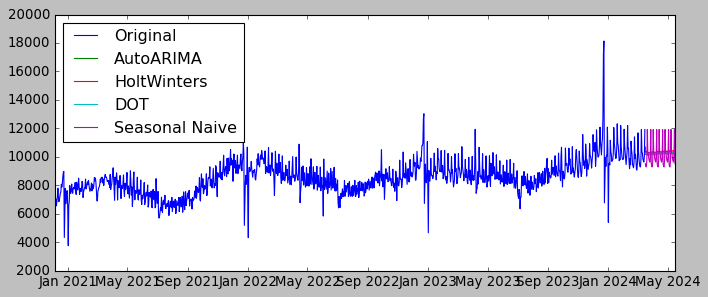

Brno_1


/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


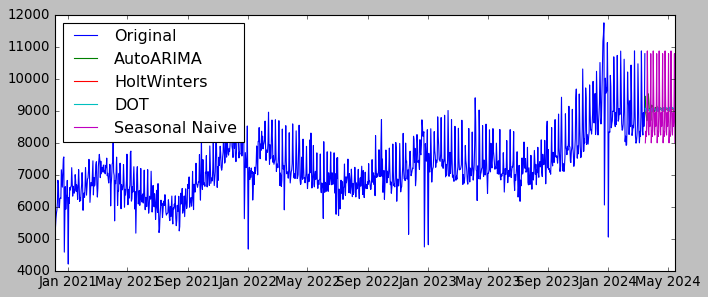

Prague_2


/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


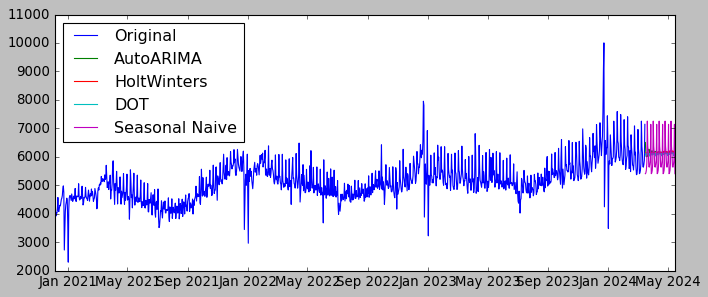

Prague_3


/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


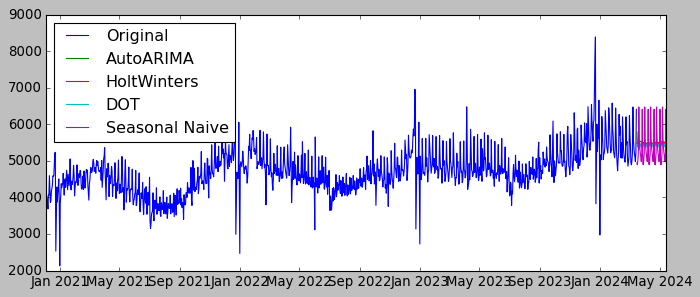

Munich_1


/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


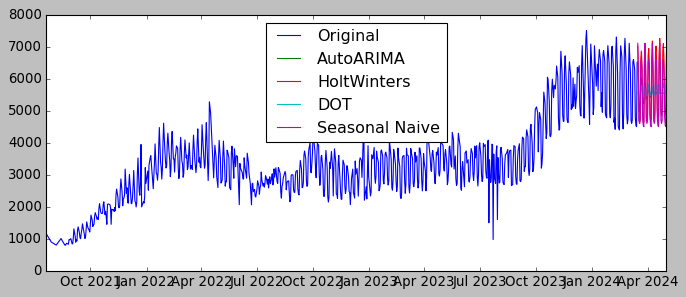

Frankfurt_1


/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


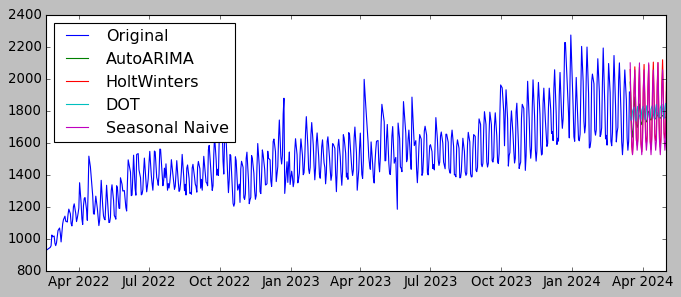

Budapest_1


/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


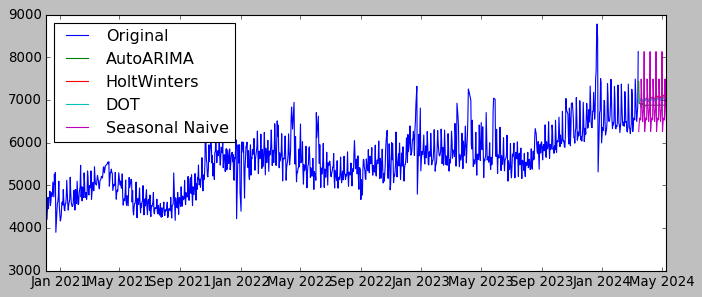

In [37]:
sf = StatsForecast(
    models = [
        AutoARIMA(season_length = 12),
        HoltWinters(season_length = 12),
        #Croston(),
        #DOT(season_length = 12),
        AutoTheta(season_length = 12),
        #MSTL(season_length = 12),
        #ADIDA()
        SeasonalNaive(season_length = 12),
        #AutoRegressive(lags = 100)
    ],
    freq = 'D',
    n_jobs = -1
)

prueba = pd.DataFrame(train.rename(columns = {'warehouse' : 'unique_id'}))[['unique_id','ds','y']]

for warehouse in ['Prague_1', 'Brno_1', 'Prague_2', 'Prague_3', 'Munich_1', 'Frankfurt_1', 'Budapest_1']:
    print(warehouse)
    
    split = prueba[prueba['unique_id'] == warehouse]

    predicciones = sf.forecast(
        df = split,
        h = offsets[warehouse],
        #df = test['ds'],
        level = [95]
    )
    plt.plot(pd.to_datetime(split['ds']), split['y'], label = 'Original')
    plt.plot(pd.to_datetime(predicciones['ds']), predicciones['AutoARIMA'], label = 'AutoARIMA')
    plt.plot(pd.to_datetime(predicciones['ds']), predicciones['HoltWinters'], label = 'HoltWinters')
    #plt.plot(pd.to_datetime(predicciones['ds']), predicciones['MSTL'], label = 'MSTL')
    plt.plot(pd.to_datetime(predicciones['ds']), predicciones['AutoTheta'], label = 'DOT')
    plt.plot(pd.to_datetime(predicciones['ds']), predicciones['SeasonalNaive'], label = 'Seasonal Naive')
    #plt.plot(pd.to_datetime(predicciones['ds']), predicciones['AutoRegressive'], label = 'Auto Regressive')
    plt.legend(loc = 'best')
    plt.show()

/home/adan/.local/lib/python3.12/site-packages/statsforecast/core.py:1447: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


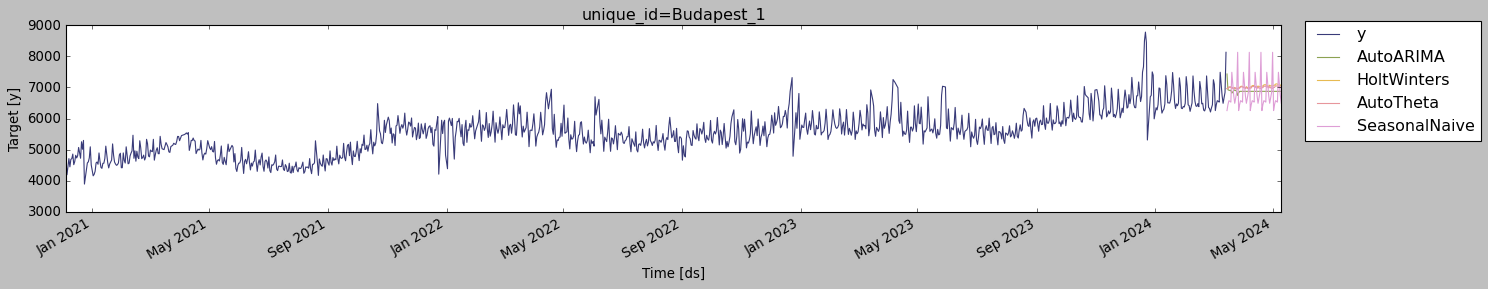

In [38]:
sf.plot(split, predicciones)